# Pandas 패키지 소개 및 대출금계산기 만들기

## Pandas 패키지 소개

### Pandas 데이터프레임

#### Pandas 패키지를 사용하기 위해 import

In [1]:
import pandas as pd

#### 비어있는 리스트 변수 생성

In [2]:
리스트 = []

#### 리스트 변수에 데이터 추가

In [4]:
리스트.append(['1', '제우스'])
리스트.append(['2', '헤라'])
리스트.append(['3', '포세이돈'])
리스트

[['1', '제우스'], ['1', '제우스'], ['2', '헤라'], ['3', '포세이돈']]

#### pandas 패키지를 이용해 데이터프레임 생성

In [5]:
데이터프레임 = pd.DataFrame(리스트)

#### 데이터프레임 출력

In [6]:
데이터프레임

,0,1
0,1,제우스
1,1,제우스
2,2,헤라
3,3,포세이돈


In [7]:
데이터프레임.columns = ['번호', '이름']
데이터프레임

,번호,이름
0,1,제우스
1,1,제우스
2,2,헤라
3,3,포세이돈


## 원리금균등분할 상환 대출금계산기

### 데이터프레임을 엑셀파일로 저장

In [8]:
데이터프레임

,번호,이름
0,1,제우스
1,1,제우스
2,2,헤라
3,3,포세이돈


* Ch1 : 메모리에 엑셀객체 생성

In [9]:
엑셀 = pd.ExcelWriter('data/이름.xlsx')

* Ch2 : 메모리 상에서 데이터프레임을 엑셀에 저장

In [10]:
데이터프레임.to_excel(엑셀, '이름', index = False)

* Ch3 : 실제 파일로 저장

In [11]:
엑셀.save()

### 엑셀파일 읽기

#### 엑셀파일 읽고 변수에 저장

In [13]:
데이터프레임_엑셀 = pd.read_excel('data/이름.xlsx')
데이터프레임_엑셀

,번호,이름
0,1,제우스
1,1,제우스
2,2,헤라
3,3,포세이돈


### 원리금 균등 분할상환 공식

#### 입력 : 대출원금, 이자율, 납입개월

In [14]:
대출원금 = 10000000
연이자율 = 5
대출기간 = 24

In [15]:
연이자율

5

In [16]:
연이자율 = 연이자율 / 100

In [18]:
이자율 = 연이자율 / 12
이자율

0.004166666666666667

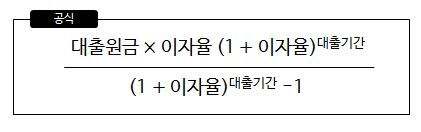

In [19]:
from IPython.display import Image
Image('data/원리금균등분할상환공식.JPG')

#### 공식계산

In [21]:
월납입액 = (대출원금 * 이자율 * (1 + 이자율) ** 대출기간) / ((1 + 이자율) ** 대출기간 - 1)
월납입액

438713.89734068594

In [22]:
월납입액 = round(월납입액)
월납입액

438714

In [23]:
대출잔액 = 대출원금

In [24]:
대출이자 = 대출잔액 * 이자율
납입원금 = 월납입액 - 대출이자
대출잔액 = 대출잔액 - 납입원금

[ 납입원금, 대출이자, 월납입액, 대출잔액 ]

[397047.3333333333, 41666.666666666664, 438714, 9602952.666666666]

In [25]:
대출이자 = 0
납입원금 = 0
대출잔액 = 대출원금
회차별대출금 = []
for 회차 in range(1, 대출기간 + 1):
    대출이자 = round(대출잔액 * 이자율)
    납입원금 = round(월납입액 - 대출이자)
    대출잔액 = 대출잔액 - 납입원금
    if 대출잔액 < 0 :
        대출잔액 = 0
    print([ 회차, 납입원금, 대출이자, 월납입액, 대출잔액])
    회차별대출금.append([회차, 납입원금, 대출이자, 월납입액, 대출잔액])

[1, 397047, 41667, 438714, 9602953]
[2, 398702, 40012, 438714, 9204251]
[3, 400363, 38351, 438714, 8803888]
[4, 402031, 36683, 438714, 8401857]
[5, 403706, 35008, 438714, 7998151]
[6, 405388, 33326, 438714, 7592763]
[7, 407077, 31637, 438714, 7185686]
[8, 408774, 29940, 438714, 6776912]
[9, 410477, 28237, 438714, 6366435]
[10, 412187, 26527, 438714, 5954248]
[11, 413905, 24809, 438714, 5540343]
[12, 415629, 23085, 438714, 5124714]
[13, 417361, 21353, 438714, 4707353]
[14, 419100, 19614, 438714, 4288253]
[15, 420846, 17868, 438714, 3867407]
[16, 422600, 16114, 438714, 3444807]
[17, 424361, 14353, 438714, 3020446]
[18, 426129, 12585, 438714, 2594317]
[19, 427904, 10810, 438714, 2166413]
[20, 429687, 9027, 438714, 1736726]
[21, 431478, 7236, 438714, 1305248]
[22, 433275, 5439, 438714, 871973]
[23, 435081, 3633, 438714, 436892]
[24, 436894, 1820, 438714, 0]


In [26]:
회차별대출금

[[1, 397047, 41667, 438714, 9602953],
 [2, 398702, 40012, 438714, 9204251],
 [3, 400363, 38351, 438714, 8803888],
 [4, 402031, 36683, 438714, 8401857],
 [5, 403706, 35008, 438714, 7998151],
 [6, 405388, 33326, 438714, 7592763],
 [7, 407077, 31637, 438714, 7185686],
 [8, 408774, 29940, 438714, 6776912],
 [9, 410477, 28237, 438714, 6366435],
 [10, 412187, 26527, 438714, 5954248],
 [11, 413905, 24809, 438714, 5540343],
 [12, 415629, 23085, 438714, 5124714],
 [13, 417361, 21353, 438714, 4707353],
 [14, 419100, 19614, 438714, 4288253],
 [15, 420846, 17868, 438714, 3867407],
 [16, 422600, 16114, 438714, 3444807],
 [17, 424361, 14353, 438714, 3020446],
 [18, 426129, 12585, 438714, 2594317],
 [19, 427904, 10810, 438714, 2166413],
 [20, 429687, 9027, 438714, 1736726],
 [21, 431478, 7236, 438714, 1305248],
 [22, 433275, 5439, 438714, 871973],
 [23, 435081, 3633, 438714, 436892],
 [24, 436894, 1820, 438714, 0]]

In [28]:
회차별대출금_DF = pd.DataFrame(회차별대출금)
회차별대출금_DF

,0,1,2,3,4
0,1,397047,41667,438714,9602953
1,2,398702,40012,438714,9204251
2,3,400363,38351,438714,8803888
3,4,402031,36683,438714,8401857
4,5,403706,35008,438714,7998151
5,6,405388,33326,438714,7592763
6,7,407077,31637,438714,7185686
7,8,408774,29940,438714,6776912
8,9,410477,28237,438714,6366435
9,10,412187,26527,438714,5954248


In [29]:
회차별대출금_DF.columns = ['회차', '납입원금', '대출이자', '월납입액', '대출잔액']
회차별대출금_DF

,회차,납입원금,대출이자,월납입액,대출잔액
0,1,397047,41667,438714,9602953
1,2,398702,40012,438714,9204251
2,3,400363,38351,438714,8803888
3,4,402031,36683,438714,8401857
4,5,403706,35008,438714,7998151
5,6,405388,33326,438714,7592763
6,7,407077,31637,438714,7185686
7,8,408774,29940,438714,6776912
8,9,410477,28237,438714,6366435
9,10,412187,26527,438714,5954248


#### 최종결과 엑셀저장

* CH1 : 메모리에 엑셀객체 생성

In [30]:
회차별대출금_엑셀 = pd.ExcelWriter('data/회차별대출금.xlsx')

* CH2 : 메모리 상 데이터프레임을 엑셀에 저장

In [31]:
회차별대출금_DF.to_excel(회차별대출금_엑셀, '회차별대출금', index = False)

* CH3 : 실제 파일 저장

In [32]:
회차별대출금_엑셀.save()